In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats

import pymc3 as pm

%matplotlib inline

In [4]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p', 0.40, 0.80)
    
    y = pm.Binomial('y', n=n,p=p, observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 12 seconds.


In [5]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.701,0.001,0.0,7487.0,7487.0,7486.0,12004.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c05fb00>,
      dtype=object)

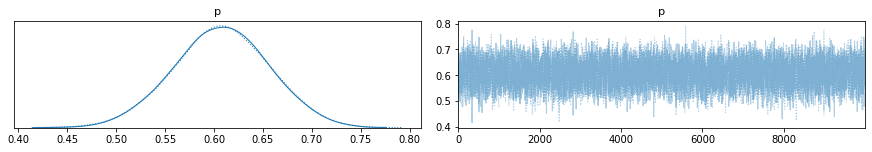

In [6]:
pm.traceplot(trace)

In [8]:
gapminder = pd.read_csv('gapminder.csv')
gdata = gapminder[gapminder.year==1985]

In [9]:
gdata.sort_values('age5_surviving', inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


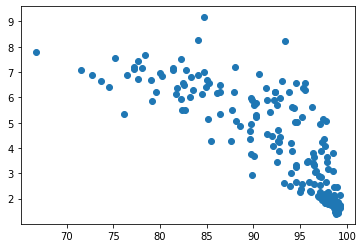

In [13]:
plt.scatter(gdata.age5_surviving, gdata.babies_per_woman)

In [17]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept', 5, 15)
    slope = pm.Uniform('slope', -1, 1)
    
    babies = pm.Normal('babies',
                          mu = intercept+slope *(gdata.age5_surviving -65),
                          sd=1,
                           observed = gdata.babies_per_woman
                      )
    trace = pm.sample(10000)
                       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 24 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [18]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,10.192,0.283,9.677,10.738,0.005,0.004,3280.0,3280.0,3292.0,4373.0,1.0
slope,-0.219,0.010,-0.237,-0.199,0.000,0.000,3319.0,3319.0,3332.0,4396.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ec3bef0>,
      dtype=object)

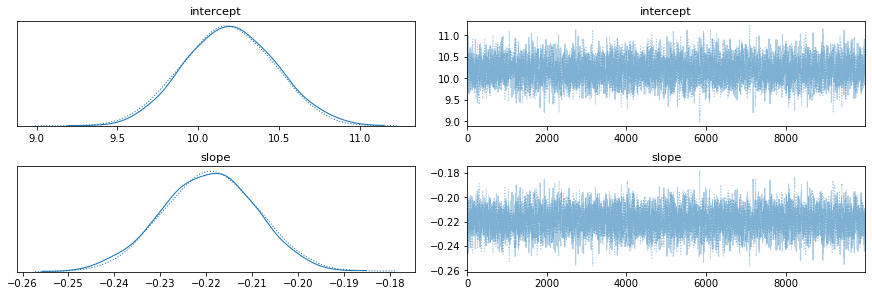

In [19]:
pm.traceplot(trace)

In [20]:
babies = trace.intercept.mean() + trace.slope.mean() * (gdata.age5_surviving -65)

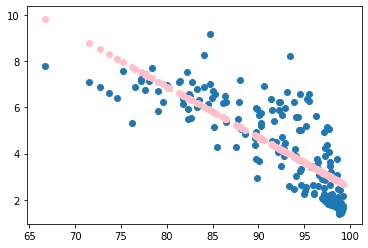

In [23]:
plt.scatter(gdata.age5_surviving, gdata.babies_per_woman)
plt.scatter(gdata.age5_surviving, babies, color='pink')

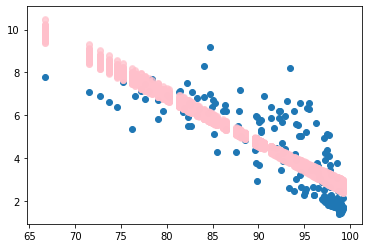

In [24]:
plt.scatter(gdata.age5_surviving, gdata.babies_per_woman)

for i, intercept, slope in zip(range(100), trace.intercept[::50], trace.slope[::50]):
    babies = intercept + slope * (gdata.age5_surviving -65)
    plt.scatter(gdata.age5_surviving, babies, color='pink', alpha=0.5)